# Pre Ayudantía 3

En este notebook podrán encontrar funciones relevantes para el desarrollo de al ayudantía 3. En esta oportunidad no van a ser tantas funciones, debido a que la gran parte de esta ayudantía son contenidos teóricos o aplicaciones de formulas matemáticas.

Para abrir en colab:
<a target="_blank" href="https://colab.research.google.com/github/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Ayudantias/preAyudantia3_IntroduccionALosTestDeHipotesis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Lectura de Archivos externos

Google Colab permite leer archivos externos, sin la necesidad de crear un repositorio de GitHub, como lo habíamos hecho anteriormente.

---

Vean el siguiente link para entender como se realiza: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/

In [4]:
from google.colab import files # recordar importar librerias
import pandas as pd
def import_and_read_file():
    path = list(files.upload().keys())[0]
    extension = path.split('.')[-1]
    if extension == 'csv':
        return pd.read_csv(path)
    else:
        return pd.read_excel(path)
## Forma de uso
#dataset = import_and_read_file() # en este caso la variable dataset va a tener guardado nuestra base de datos.
# la linea va a estar comentada para que el google colab corra de corrido, pero pueden utilizarlo libremente.
# solo saquen el # de la linea

Notar que esta función es solo para Google Colab, si están trabajando en algún otro tipo de programa nos comentan para ver como lo solucionamos.

# Distribuciones

Para obtener diferentes funciones de una distribución, es decir: funcion de probabilidad acumulada (cdf), función de densidad de probabilidad (pdf), función de percentiles de probabilidad (ppf). Basta con utilizar la librería `scipy.stats`. Probemos con una distribución normal.

In [19]:
import scipy.stats as st
import numpy as np
# definimos parámetros de la distribución
mean = 0 # promedio
var = 1 # varianza

# generar datos aleatorios de dicha probabilidad
datos_aleatorios = st.norm.rvs(loc = mean, # loc -> promedio
                               scale = np.sqrt(var), # scale -> desviación estandar
                               size = 1000, # tamaño de la muestra
                               random_state = 42) # estado aleatorio, permite replicación

# densidad de un punto cualquiera dada la distribución normal
pdf_norm = st.norm.pdf(mean,
                       loc = mean,
                       scale = np.sqrt(var)) # 1 / np.sqrt(2 * np.pi * var)
# probabilidad acumulada
cdf_norm = st.norm.cdf(mean,
                       loc = mean,
                       scale = np.sqrt(var)) # 0.5 porque es la mitad

# posición de un percentil en una distribución normal
ppf_norm = st.norm.ppf(0.975,
                       loc = mean,
                       scale = np.sqrt(var)) # nos ayudará bastante posteriormente


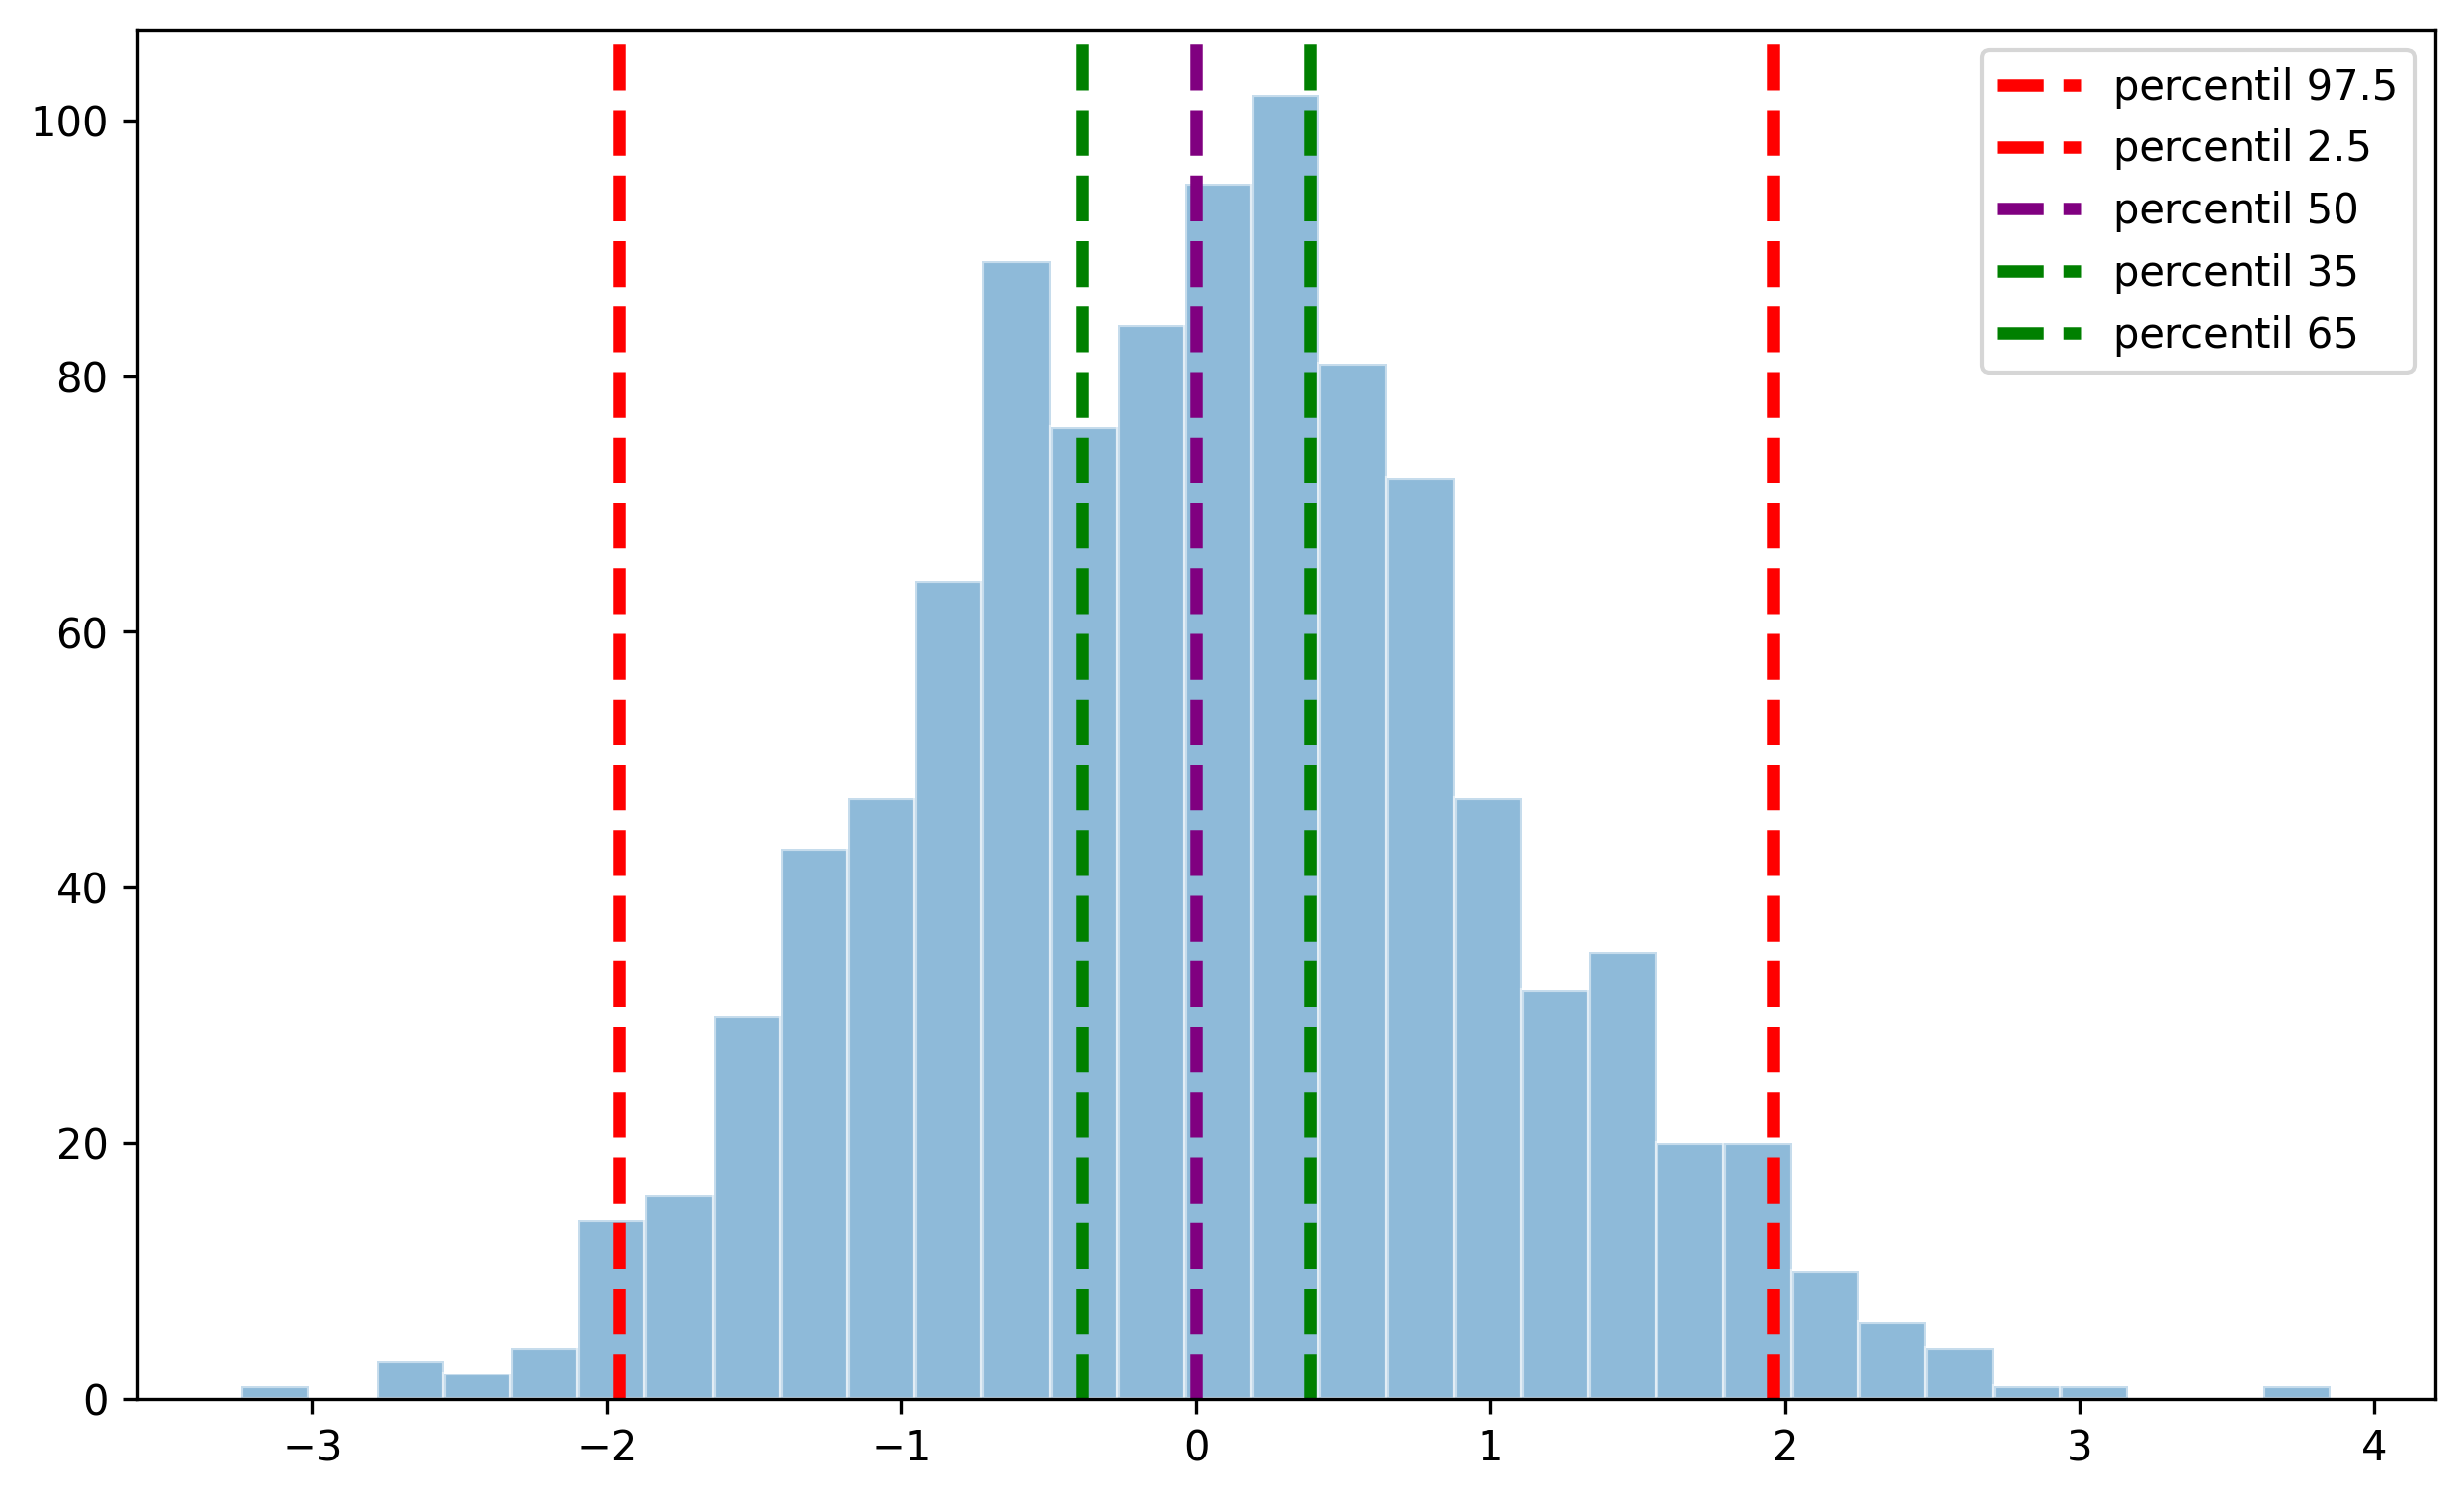

In [36]:
import matplotlib.pyplot as plt

# visualicemos los datos aleatorios junto al ppf en diferentes puntos

ppf_0975 = st.norm.ppf(0.975,
                       loc = mean,
                       scale = np.sqrt(var))
ppf_0025 = st.norm.ppf(0.025,
                       loc = mean,
                       scale = np.sqrt(var))
ppf_035 = st.norm.ppf(0.35,
                       loc = mean,
                       scale = np.sqrt(var))
ppf_05 = st.norm.ppf(0.5,
                       loc = mean,
                       scale = np.sqrt(var))
ppf_065 = st.norm.ppf(0.65,
                       loc = mean,
                       scale = np.sqrt(var))

fig, ax = plt.subplots(1, 1, figsize = (10, 6), dpi = 300)

ax.hist(datos_aleatorios, bins = int(np.sqrt(1000)), edgecolor = 'white', alpha = 0.5)
ax.axvline(ppf_0975, color = 'red', linestyle = '--', label = 'percentil 97.5', linewidth = 3)
ax.axvline(ppf_0025, color = 'red', linestyle = '--', label = 'percentil 2.5',  linewidth = 3)
ax.axvline(ppf_05, color = 'purple', linestyle = '--', label = 'percentil 50',  linewidth = 3)
ax.axvline(ppf_035, color = 'green', linestyle = '--', label = 'percentil 35', linewidth = 3)
ax.axvline(ppf_065, color = 'green', linestyle = '--', label = 'percentil 65', linewidth = 3)
ax.legend()

Si quieren analizar otras distribuciones simplemente cambien el `norm` de la función, por su distribución favorita. Pueden ver las disponibles en el siguiente link: [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)



# Test de hipótesis

Muchas librerias de python permiten realizar test de hipótesis. Durante el curso utilizaremos dos: [Statsmodels](https://www.statsmodels.org/dev/stats.html#basic-statistics-and-t-tests-with-frequency-weights) y [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html). En esta oportunidad empezaremos con el test z.

In [38]:
from statsmodels.stats.weightstats import ztest
help(ztest) # el comando help permite ver la documentación de la función

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la

In [46]:
# Supongamos que tenemos los siguientes datos
datos_prueba = st.norm.rvs(loc = 3, scale = 2, size = 100)
# Bajo al siguiente hipótesis
# H_0: mu = 4
# H_a: mu < 4
# Entonces para calcular tanto el estadístico como el valor-p realizamos
statistic, pval = ztest(
    datos_prueba,
    value = 4, # el valor que queremos testear
    ddof = 0, # por ahora dejar en 0
    alternative = 'smaller' # el tipo de hipótesis

)
print(f'El estadístico es: {statistic:.2f}')
print(f'El valor-p es: {pval:2e}')

El estadístico es: -5.75
El valor-p es: 4.509805e-09


In [47]:
# Si queremos comparar dos muestras
datos_prueba2 = st.norm.rvs(loc = 2, scale = 5, size = 100)
# Bajo al siguiente hipótesis
# H_0: mu1 = mu2
# H_a: mu1 > mu2
# Entonces para calcular tanto el estadístico como el valor-p realizamos

statistic, pval = ztest(
    datos_prueba,
    datos_prueba2,
    value = 0, # el valor que queremos testear
    alternative = 'larger' # el tipo de hipótesis

)
print(f'El estadístico es: {statistic:.2f}')
print(f'El valor-p es: {pval:2e}')


El estadístico es: 1.07
El valor-p es: 1.416665e-01
